<a href="https://colab.research.google.com/github/Stella-kimani/.Stl_Week_14_R/blob/master/Stella_Part3_Association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rules

Task:

The task is to create association rules that will allow me to identify relationships between variables in the supermarket sales dataset.

I will then provide insights based on my findings.

In [1]:
# loading the arules library
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
# Loading our dataset
library(arules)
df1= read.transactions("/content/Supermarket_Sales_Dataset II.csv", 
                  header = FALSE, sep = "", 
                  cols = NULL, rm.duplicates = FALSE, 
                  quote = "\"'", skip = 0, 
                  encoding = "unknown")
head(df1)



Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 6 transactions (rows) and
 5729 items (columns)

In [6]:
# inspecting the first 3 transactions
inspect(df1[1:3])

    items                              
[1] {cheese,energy,                    
     drink,tomato,                     
     fat,                              
     flour,yams,cottage,               
     grapes,whole,                     
     juice,frozen,                     
     juice,low,                        
     mix,green,                        
     oil,                              
     shrimp,almonds,avocado,vegetables,
     smoothie,spinach,olive,           
     tea,honey,salad,mineral,          
     water,salmon,antioxydant,         
     weat,                             
     yogurt,green}                     
[2] {burgers,meatballs,eggs}           
[3] {chutney}                          


In [7]:
# Verifying the object's class
# ---
# This should show us transactions as the type of data that we will need
# ---
# 
class(df1)

[1] "transactions"
attr(,"package")
[1] "arules"

In [8]:
 #Let me create a  dataframe and preview the items that make up our dataset,

items<-as.data.frame(itemLabels(df1))
colnames(items) <- "Item"
head(items, 8) 

,Item
,<fct>
1,&
2,accessories
3,"accessories,antioxydant"
4,"accessories,champagne,fresh"
5,"accessories,champagne,protein"
6,"accessories,chocolate"
7,"accessories,chocolate,champagne,frozen"
8,"accessories,chocolate,frozen"


In [9]:
# summary of the dataset
summary(df1)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 5729 columns (items) and a density of 0.0005421748 

most frequent items:
    tea   wheat mineral     fat  yogurt (Other) 
    803     645     577     574     543   20157 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   15   16 
1603 2007 1382  942  651  407  228  151   70   39   13    5    1    1    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.106   4.000  16.000 

includes extended item information - examples:
                   labels
1                       &
2             accessories
3 accessories,antioxydant

This  gives us some information such as the most purchased items which is mineral water, spaghetti, eggs, burgers and chocolates.We are able to see the distribution of the item sets, number of items purchased in each transaction.

In [10]:
#Exploring the frequency of some articles 
# i.e. transacations ranging from 8 to 15 and performing 
# some operation in percentage terms of the total transactions 
# 
itemFrequency(df1[, 8:15],type = "absolute")
round(itemFrequency(df1[, 8:15],type = "relative")*100,2)

accessories,chocolate,frozen        accessories,chocolate,low 
                               1                                1 
accessories,chocolate,pasta,salt accessories,chocolate,salt,green 
                               1                                1 
             accessories,cookies              accessories,cottage 
                               5                                2 
            accessories,escalope               accessories,french 
                               1                               13

accessories,chocolate,frozen        accessories,chocolate,low 
                            0.01                             0.01 
accessories,chocolate,pasta,salt accessories,chocolate,salt,green 
                            0.01                             0.01 
             accessories,cookies              accessories,cottage 
                            0.07                             0.03 
            accessories,escalope               accessories,french 
                            0.01                             0.17

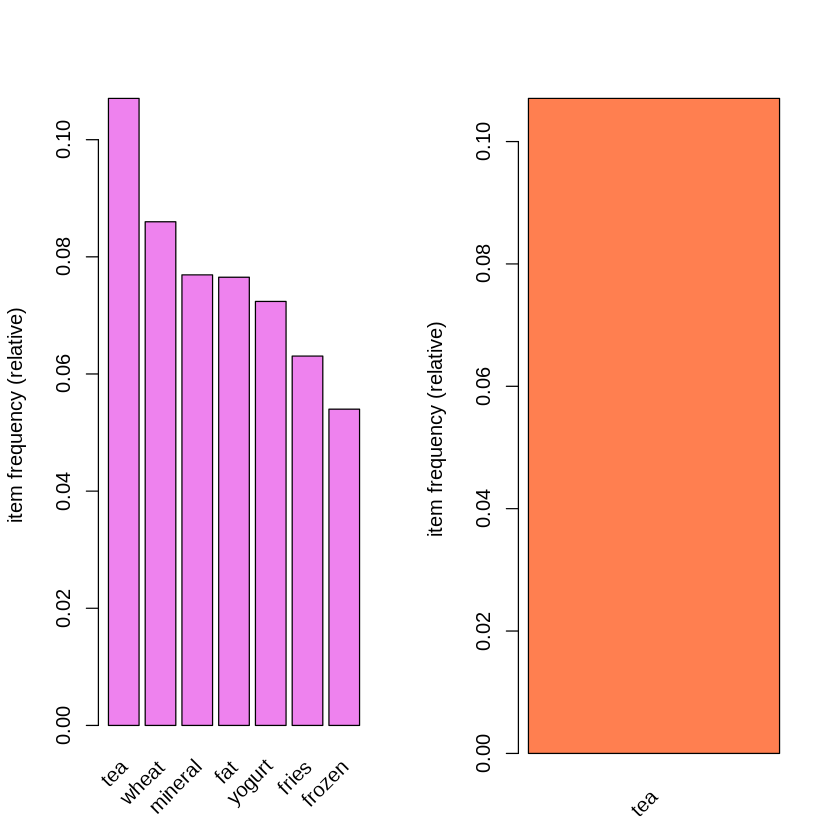

In [24]:

# Displaying top 7 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))
# plot the frequency of items
itemFrequencyPlot(df1, topN = 7,col="violet",)
itemFrequencyPlot(df1, support = 0.1, ,col="coral")

Tea is the most frequent item and then followed by wheat, mineral water, fat , yoghurt, fries and lastly frozen food stuffs.

In [12]:
# building a model using apriori function and min support 0.001 and confidence 0.8
rules <- apriori(df1, parameter = list(supp = 0.001, conf = 0.8))
rules



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [354 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [271 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 271 rules 

In [13]:
# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (df1,parameter = list(supp = 0.002, conf = 0.8)) 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [189 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [99 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [14]:
# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (df1, parameter = list(supp = 0.001, conf = 0.6)) 
rules3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [354 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [319 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 319 rules 

In [15]:
# previewing a summary of our rules
summary(rules)

set of 396074 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5     6     7     8     9    10 
   74  1620  9314 29384 60048 86503 91722 73163 44246 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   6.000   8.000   7.548   9.000  10.000 

summary of quality measures:
    support           confidence        coverage             lift        
 Min.   :0.008547   Min.   :0.8000   Min.   :0.008547   Min.   :  1.534  
 1st Qu.:0.008547   1st Qu.:1.0000   1st Qu.:0.008547   1st Qu.:  3.079  
 Median :0.008547   Median :1.0000   Median :0.008547   Median :  4.875  
 Mean   :0.009065   Mean   :0.9996   Mean   :0.009088   Mean   : 13.142  
 3rd Qu.:0.008547   3rd Qu.:1.0000   3rd Qu.:0.008547   3rd Qu.:  9.750  
 Max.   :0.299145   Max.   :1.0000   Max.   :0.350427   Max.   :117.000  
     count       
 Min.   : 1.000  
 1st Qu.: 1.000  
 Median : 1.000  
 Mean   : 1.061  
 3rd Qu.: 1.000  
 Max.   :35.000  

mining info:
        data ntransactions support conf

In [15]:
# inspecting the first 5 rules built by our model
inspect(rules[1:5])

    lhs                                rhs      support     confidence
[1] {cookies,low}                   => {yogurt} 0.001066524 1         
[2] {cookies,low}                   => {fat}    0.001066524 1         
[3] {extra}                         => {dark}   0.001066524 1         
[4] {burgers,whole}                 => {wheat}  0.001199840 1         
[5] {fries,escalope,pasta,mushroom} => {cream}  0.001066524 1         
    coverage    lift     count
[1] 0.001066524 13.81400 8    
[2] 0.001066524 13.06794 8    
[3] 0.001066524 83.34444 8    
[4] 0.001199840 11.62946 9    
[5] 0.001066524 47.77707 8    


In [16]:
# sorting the rules in decreasing order of confidence
rules <- sort(rules, by = "confidence", decreasing = TRUE)
inspect(rules[1:5])

    lhs                                rhs      support     confidence
[1] {cookies,low}                   => {yogurt} 0.001066524 1         
[2] {cookies,low}                   => {fat}    0.001066524 1         
[3] {extra}                         => {dark}   0.001066524 1         
[4] {burgers,whole}                 => {wheat}  0.001199840 1         
[5] {fries,escalope,pasta,mushroom} => {cream}  0.001066524 1         
    coverage    lift     count
[1] 0.001066524 13.81400 8    
[2] 0.001066524 13.06794 8    
[3] 0.001066524 83.34444 8    
[4] 0.001199840 11.62946 9    
[5] 0.001066524 47.77707 8    


The given five rules have a confidence of 100.

In [18]:
# If we're interested in making a promotion relating to the sale of yogurt, 
# we could create a subset of rules concerning these products 
# ---
# This would tell us the items that the customers bought before purchasing yogurt

yogurt <- subset(rules, subset = rhs %pin% "yogurt")
 
# Then order by confidence
yogurt<-sort(yogurt, by="confidence", decreasing=TRUE)
inspect(yogurt[1:5])

    lhs                  rhs      support     confidence coverage    lift  
[1] {cookies,low}     => {yogurt} 0.001066524 1          0.001066524 13.814
[2] {wine,low}        => {yogurt} 0.001333156 1          0.001333156 13.814
[3] {cheese,low}      => {yogurt} 0.001733102 1          0.001733102 13.814
[4] {mayo,low}        => {yogurt} 0.001733102 1          0.001733102 13.814
[5] {cookies,low,fat} => {yogurt} 0.001066524 1          0.001066524 13.814
    count
[1]  8   
[2] 10   
[3] 13   
[4] 13   
[5]  8   


In [17]:
# What if we wanted to determine items that customers might buy 
# who have previously bought yogurt?
# ---
# 
# Subset the rules
yogurt <- subset(rules2, subset = lhs %pin% "yogurt")

# Order by confidence
yogurt<-sort(yogurt, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(yogurt[9:19])

     lhs                           rhs   support     confidence coverage   
[1]  {vegetables,ground,yogurt} => {fat} 0.002133049 1          0.002133049
[2]  {beef,mineral,yogurt}      => {fat} 0.002133049 1          0.002133049
[3]  {herb,yogurt}              => {&}   0.002799627 1          0.002799627
[4]  {herb,yogurt}              => {fat} 0.002799627 1          0.002799627
[5]  {grated,yogurt}            => {fat} 0.003466205 1          0.003466205
[6]  {frozen,yogurt}            => {fat} 0.004799360 1          0.004799360
[7]  {mineral,yogurt}           => {fat} 0.007732302 1          0.007732302
[8]  {&,yogurt}                 => {fat} 0.005199307 1          0.005199307
[9]  {wheat,yogurt}             => {fat} 0.006932409 1          0.006932409
[10] {&,herb,yogurt}            => {fat} 0.002799627 1          0.002799627
[11] {fat,herb,yogurt}          => {&}   0.002799627 1          0.002799627
     lift     count
[1]  13.06794 16   
[2]  13.06794 16   
[3]  20.21833 21   
[4]  13.

#Conclusion
 We can see that the frequently bought together with low fat yourghut are
tea is the most frequent item and then followed by wheat, mineral water, fat , yoghurt, fries and lastly frozen food stuffs.
We have also seen that customers  who have previously bought yogurt may also purchase vegetables,ground,beef,mineral water,herbs, fat and wheat together with yoghurt.        
           
